In [2]:
#  Hi, my name is Tate Doherty and this is my UK Accidents Project. This UK Accidents Project uses python in 
# Jupyter Notebooks. In this project, I explore 1.8 million accidents of UK traffic data from 2005-2014, examining relationships 
# between various accident attributes. The dataset encompasses a wide array of factors including accident severity,
# light conditions, weather conditions, day of the week and more. My exploratory journey involves the creation of bar graphs
# to decipher trends in accident occurrence, box plots to understand the distribution of accident features, and pie charts to 
# visualize the distribution of accidents across different light and weather conditions. Additionally, we leverage a heatmap 
# correlation matrix to unveil relationships between various numerical features, providing a comprehensive overview of the 
# dataset.

#import necessary libraries

import pandas as pd

# Load the dataset: https://www.kaggle.com/datasets/devansodariya/road-accident-united-kingdom-uk-dataset

file_path = r'C:\Users\ondoh\Downloads\UK_Accident.csv\UK_Accident.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset

df.head(10)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,None,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
5,5,200501BS00006,524770.0,181160.0,-0.203238,51.515540,1,3,2,1,11/01/2005,3,12:40,12,E09000020,6,0,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,Ol or diesel,None,1,Yes,E01002832,2005
6,6,200501BS00007,524220.0,180830.0,-0.211277,51.512695,1,3,2,1,13/01/2005,5,20:40,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
7,7,200501BS00009,525890.0,179710.0,-0.187623,51.502260,1,3,1,2,14/01/2005,6,17:35,12,E09000020,3,315,Dual carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002889,2005
8,8,200501BS00010,527350.0,177650.0,-0.167342,51.483420,1,3,2,2,15/01/2005,7,22:43,12,E09000020,3,3212,Single carriageway,30,Automatic traffic signal,4,304,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005
9,9,200501BS00011,524550.0,180810.0,-0.206531,51.512443,1,3,2,5,15/01/2005,7,16:00,12,E09000020,4,450,Single carriageway,30,Giveway or uncontrolled,5,0,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005


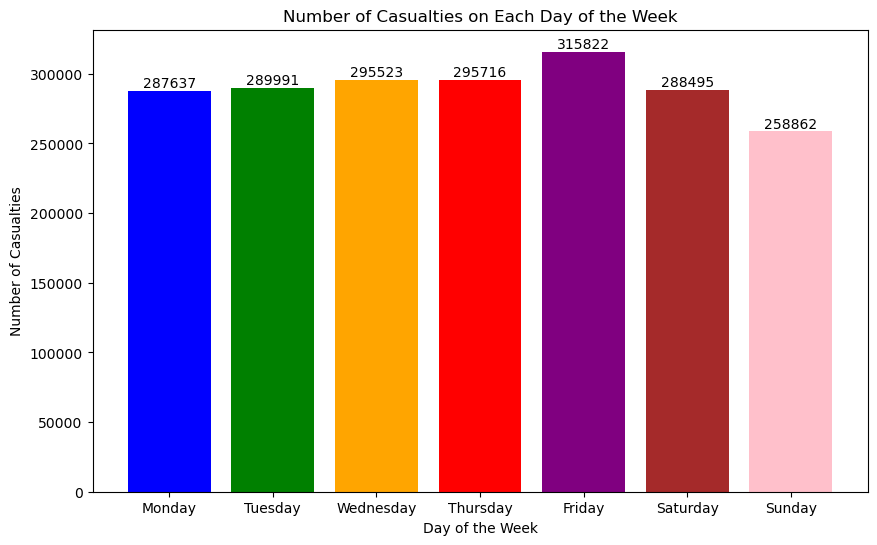

In [17]:
# create a vertical bar graph for the number of casualties per day of the week

import matplotlib.pyplot as plt

# Assuming 'Date' is a column in the DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day_of_Week'] = df['Date'].dt.day_name()

# Alternatively, if you have a 'Day_of_the_Week' column with numbers 1-7
# Uncomment the line below and comment the line above
# df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Group by day of the week and calculate the number of casualties
casualties_by_day = df.groupby('Day_of_Week')['Number_of_Casualties'].sum().reset_index()

# Sort the data by the day of the week in the desired order (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
casualties_by_day['Day_of_Week'] = pd.Categorical(casualties_by_day['Day_of_Week'], categories=days_order, ordered=True)
casualties_by_day = casualties_by_day.sort_values('Day_of_Week')

# Define colors for each day
day_colors = {'Monday': 'blue', 'Tuesday': 'green', 'Wednesday': 'orange', 'Thursday': 'red', 'Friday': 'purple', 'Saturday': 'brown', 'Sunday': 'pink'}

# Plotting the vertical bar graph with different colors for each day
plt.figure(figsize=(10, 6))
bars = plt.bar(casualties_by_day['Day_of_Week'], casualties_by_day['Number_of_Casualties'], color=[day_colors[day] for day in casualties_by_day['Day_of_Week']])

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100, round(yval), ha='center', va='bottom')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Casualties')
plt.title('Number of Casualties on Each Day of the Week')
plt.show()


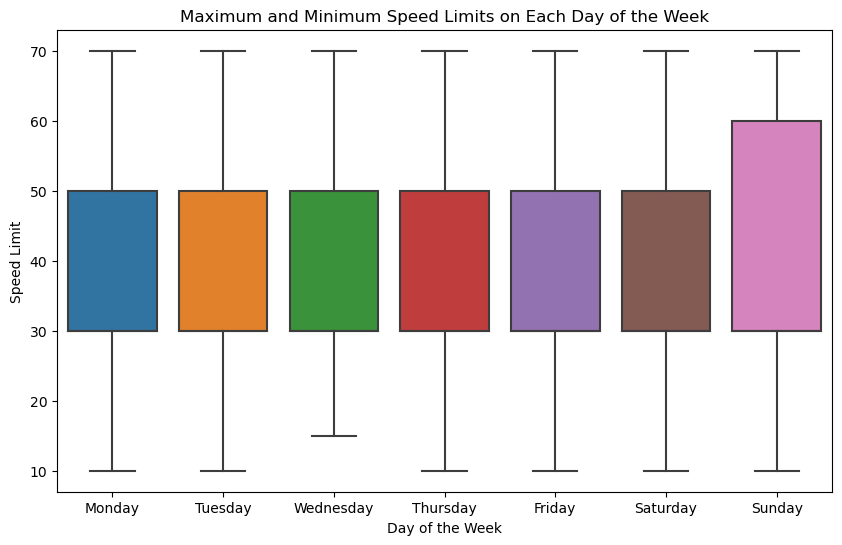

In [5]:
# create a box plot for the speed limit for the number of casualties per day of the week

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date' is a column in the DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()

# Alternatively, if you have a 'Day_of_the_Week' column with numbers 1-7
# Uncomment the line below and comment the line above
# df['Day_of_Week'] = pd.to_datetime(df['Date']).dt.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Assuming 'Speed_limit' is the column representing speed limits
speed_limits_by_day = df.groupby('Day_of_Week')['Speed_limit'].agg(['max', 'min']).reset_index()

# Sort the data by the day of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
speed_limits_by_day['Day_of_Week'] = pd.Categorical(speed_limits_by_day['Day_of_Week'], categories=days_order, ordered=True)
speed_limits_by_day = speed_limits_by_day.sort_values('Day_of_Week')

# Plotting the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y='Speed_limit', data=df, order=days_order)
plt.xlabel('Day of the Week')
plt.ylabel('Speed Limit')
plt.title('Maximum and Minimum Speed Limits on Each Day of the Week')
plt.show()


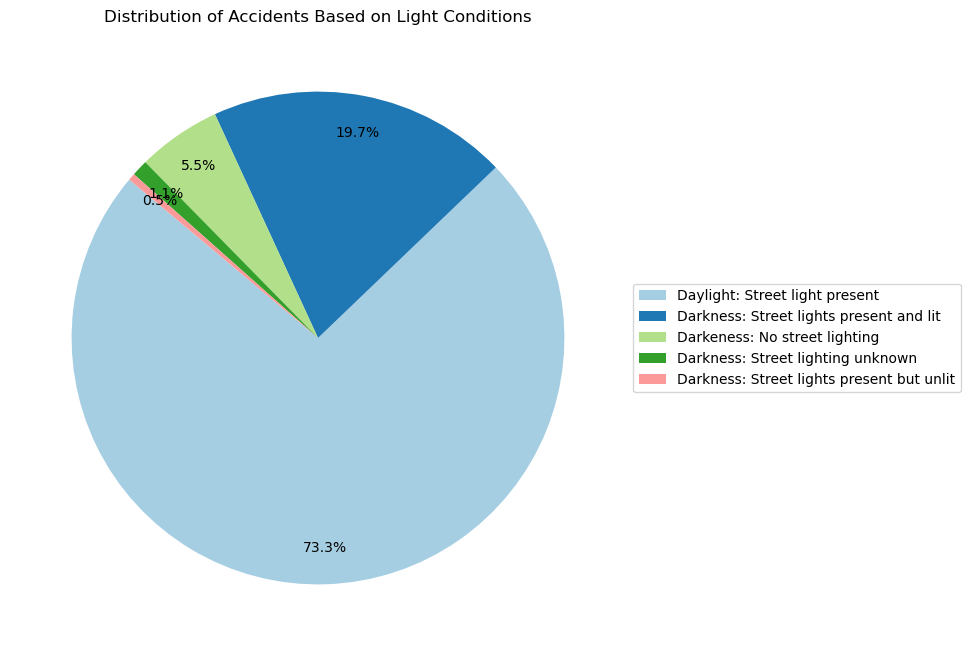

In [6]:
# create a pie chart for the number of accidents based on light conditions

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Light_Conditions' is the column in the DataFrame
light_conditions_counts = df['Light_Conditions'].value_counts()

# Plotting the pie chart with percentages inside
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(light_conditions_counts, labels=None, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Adding data labels inside the pie chart
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_size(10)

# Adding a legend with categories
plt.legend(light_conditions_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Accidents Based on Light Conditions')
plt.show()



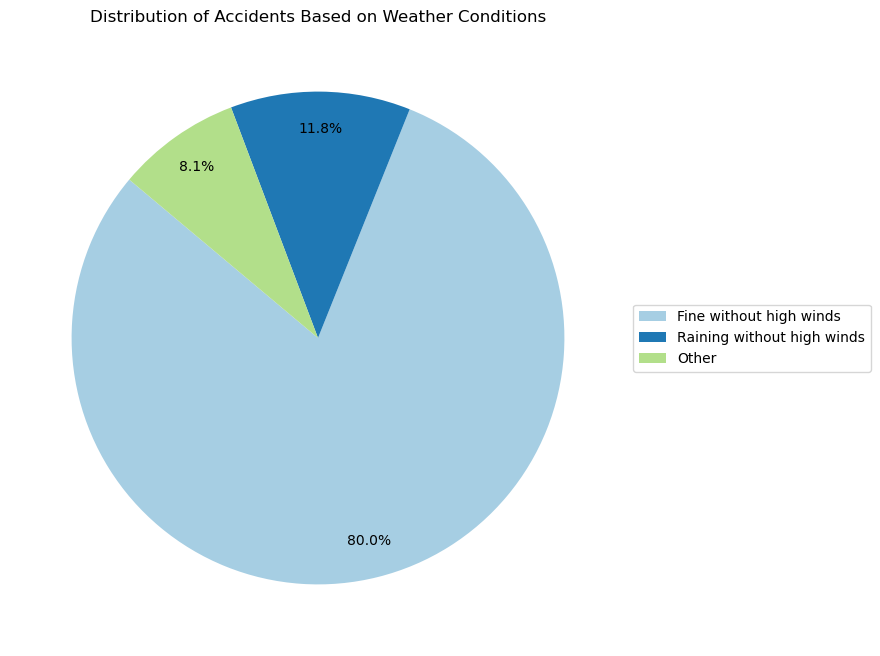

In [7]:
# create a pie chart for the number of accidents based on weather conditions

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Weather_Conditions' is the column in the DataFrame
# Create a new category 'Other' for all cells not specified
specified_conditions = ['Fine without high winds', 'Raining without high winds']
df['Weather_Conditions'] = df['Weather_Conditions'].apply(lambda x: x if x in specified_conditions else 'Other')

# Count occurrences of each category
weather_conditions_counts = df['Weather_Conditions'].value_counts()

# Plotting the pie chart with percentages inside
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(weather_conditions_counts, labels=None, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Adding data labels inside the pie chart
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_size(10)

# Adding a legend with categories
plt.legend(weather_conditions_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Accidents Based on Weather Conditions')
plt.show()


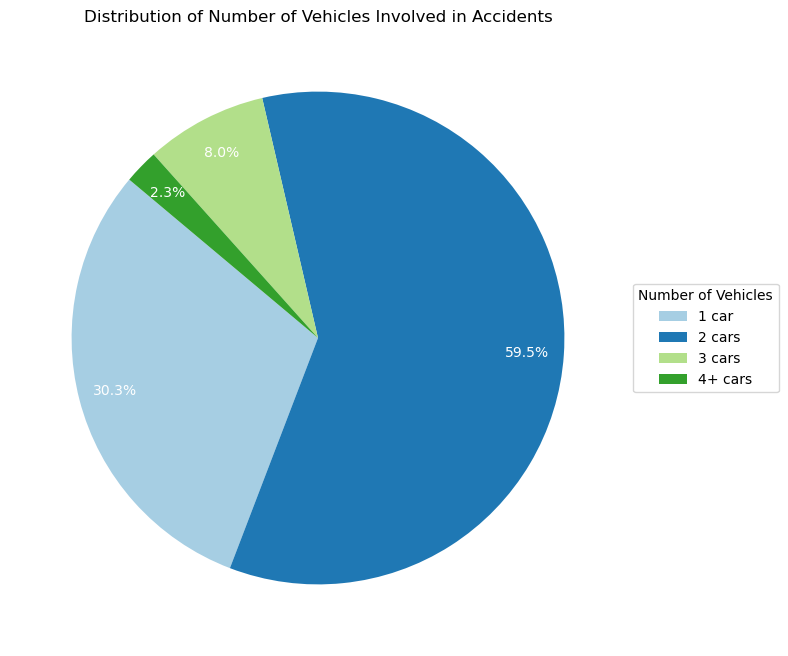

In [13]:
# create a pie chart for the number of vehicles invloved in accidents

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Number_of_Vehicles' is the column in the DataFrame
df['Vehicle_Category'] = pd.cut(df['Number_of_Vehicles'], bins=[0, 1, 2, 3, float('inf')], labels=['1 car', '2 cars', '3 cars', '4+ cars'])

# Count occurrences of each category
vehicle_category_counts = df['Vehicle_Category'].value_counts().sort_index()

# Plotting the pie chart with a legend
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(vehicle_category_counts, labels=None, autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Adding data labels inside the pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size(10)

# Adding a legend with categories
plt.legend(vehicle_category_counts.index, title='Number of Vehicles', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribution of Number of Vehicles Involved in Accidents')
plt.show()




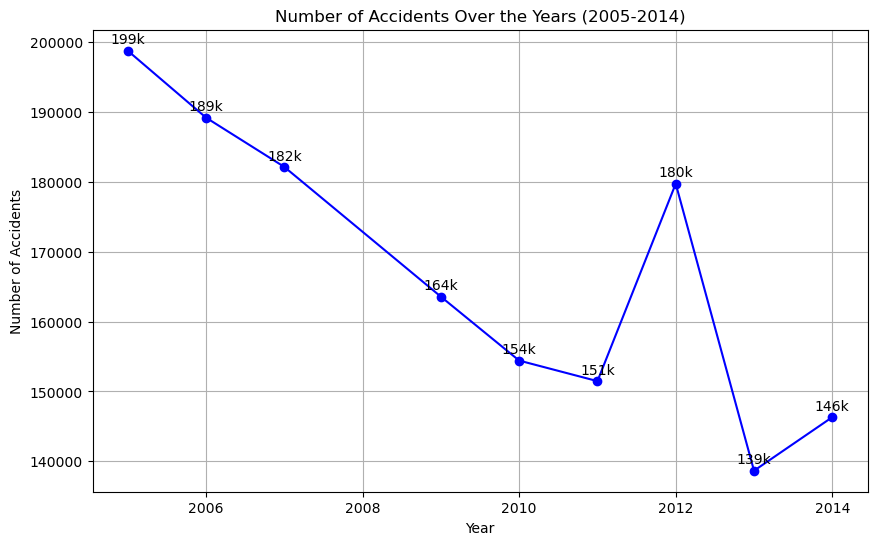

In [8]:
# create a time chart for the number of accidents over the years 2005-2014

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' is the column in the DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# Group by year and count the number of accidents
accidents_by_year = df['Year'].value_counts().sort_index()

# Plotting the time chart with data labels
plt.figure(figsize=(10, 6))
plt.plot(accidents_by_year.index, accidents_by_year.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over the Years (2005-2014)')

# Adding data labels
for i, txt in enumerate(accidents_by_year.values):
    plt.annotate(f'{txt/1000:.0f}k', (accidents_by_year.index[i], txt), textcoords="offset points", xytext=(0, 5), ha='center')

plt.grid(True)
plt.show()



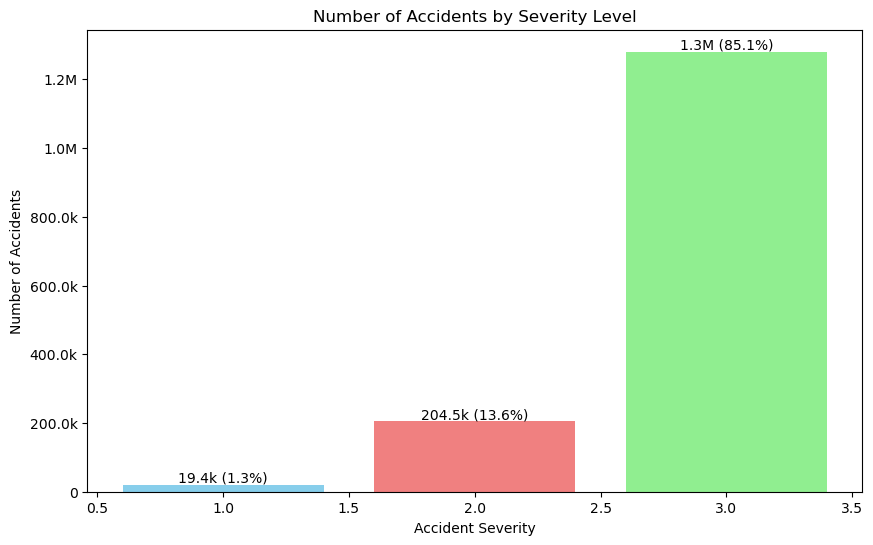

In [16]:
# create a vertical bar chart for the number of accidents based on accident severity

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming 'Accident_Severity' is the column in the DataFrame
severity_counts = df['Accident_Severity'].value_counts().sort_index()

total_accidents = severity_counts.sum()

# Function to format y-axis labels
def format_labels(value, _):
    if value < 1000:
        return f'{value:.0f}'
    elif value < 1000000:
        return f'{value / 1000:.1f}k'
    else:
        return f'{value / 1000000:.1f}M'

# Specify colors for each severity level
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightsalmon']

plt.figure(figsize=(10, 6))
bars = plt.bar(severity_counts.index, severity_counts.values, color=colors)

# Adding data labels with percentages
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_accidents) * 100
    label = f'{format_labels(yval, None)} ({percentage:.1f}%)'
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100, label, ha='center', va='bottom')

plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Severity Level')

# Format y-axis labels
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_labels))

plt.show()


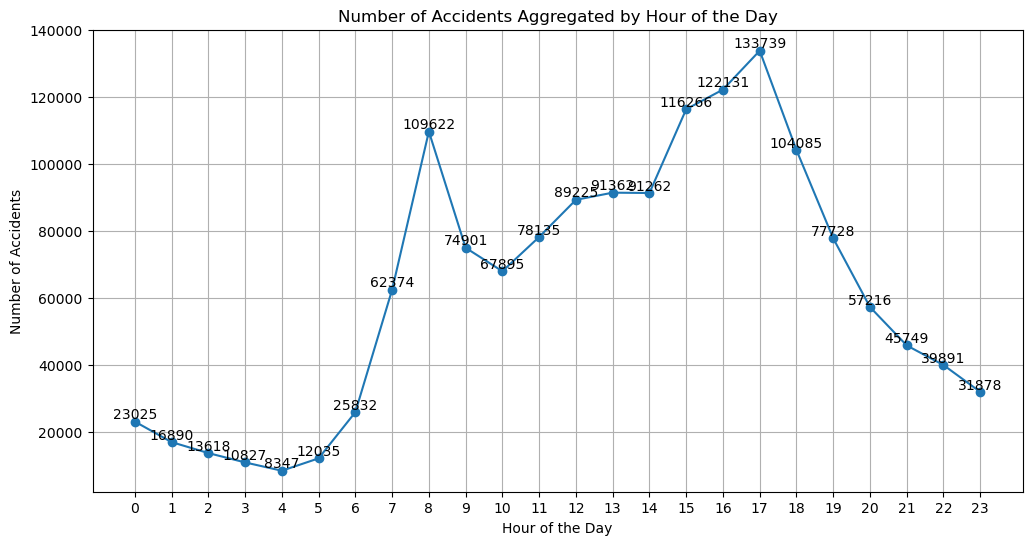

In [18]:
# create a time chart for the number of accidents based on hour of the day

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Time' is a column in the DataFrame
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Extracting the hour from the 'Time' column
df['Hour'] = df['Time'].dt.hour

# Group by hour and calculate the number of accidents
accidents_by_hour = df.groupby('Hour').size().reset_index(name='Accident_Count')

# Plotting the time chart
plt.figure(figsize=(12, 6))
plt.plot(accidents_by_hour['Hour'], accidents_by_hour['Accident_Count'], marker='o', linestyle='-')

# Adding data labels
for index, value in zip(accidents_by_hour['Hour'], accidents_by_hour['Accident_Count']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Aggregated by Hour of the Day')
plt.xticks(range(24))
plt.grid(True)
plt.show()


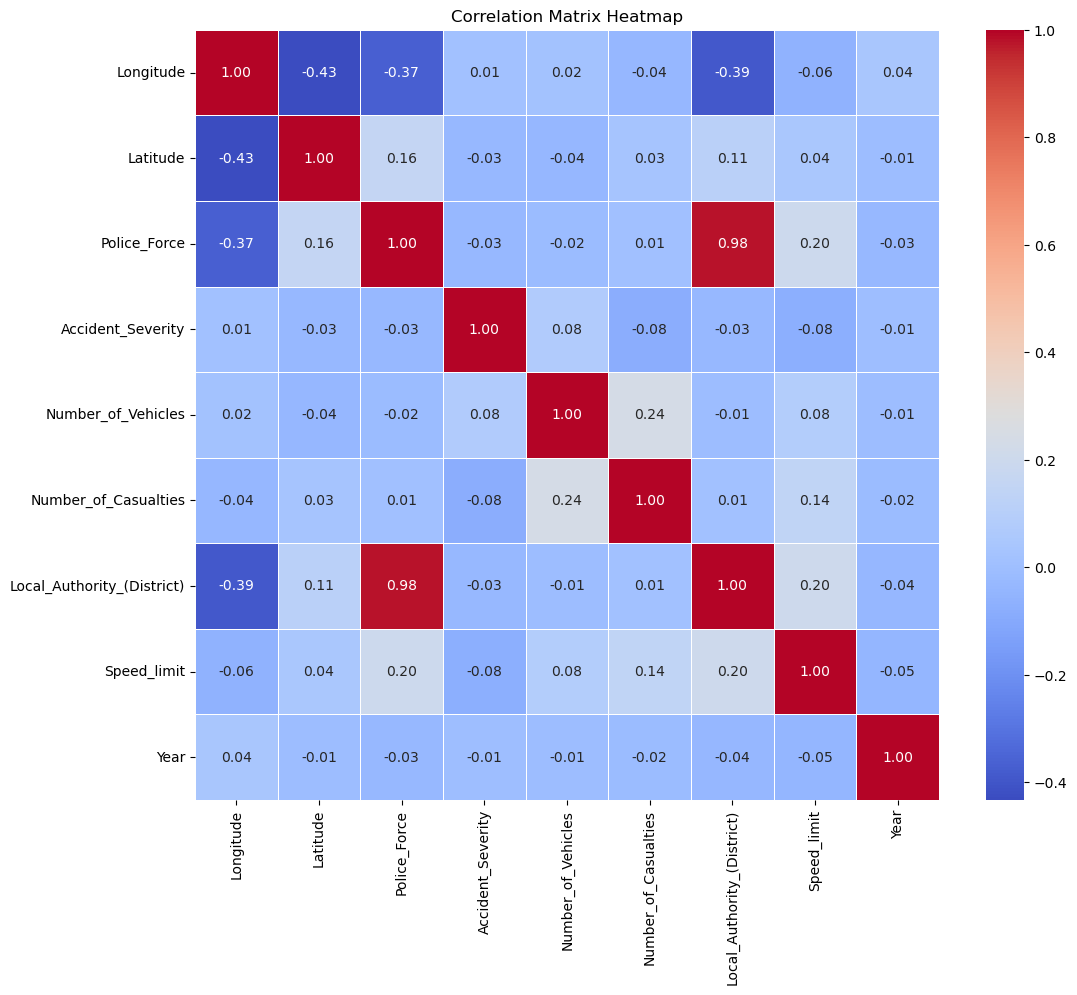

In [32]:
# create a correlation matrix heatmap that unveils relationships between various numerical features

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
selected_columns = [
    'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
    'Number_of_Vehicles', 'Number_of_Casualties',
    'Local_Authority_(District)',
     'Speed_limit', 'Year'
]

correlation_matrix = df[selected_columns].corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
